# Some documentation aboout the Xarray Package

I highly recommend to go through the [Xarray](https://docs.xarray.dev/en/stable/user-guide/index.html) documentation, there are **tons** of very useful functions when dealing with [Netcdf](https://pro.arcgis.com/en/pro-app/latest/help/data/multidimensional/what-is-netcdf-data.htm) files. Basically, Xarray is your best friend when your work involves gridded data stored along stable dimensions (e.g., time, longitude, latitude, depth).
Xarray as some python packages dependancy (python3, numpy, pandas, netcdf4)

Here, I am only providing the basics concepts.

In [1]:
import xarray as xr
import matplotlib.pyplot as plt

### Load data

NetCDF file are very common in geoscience due to their easy management and their organizations (especially their metadata).

In [2]:
path_to_file = './data/'
file_nc = 'nazare_bathy.nc'

In [3]:
ds = xr.open_dataset(path_to_file + file_nc) # open_dataset in the simplest way to load a NetCDF file with python
ds

<xarray.Dataset> Size: 10MB
Dimensions:             (latitude: 401, longitude: 693)
Coordinates:
  * latitude            (latitude) float64 3kB 39.37 39.37 39.37 ... 39.78 39.78
  * longitude           (longitude) float64 6kB -9.754 -9.753 ... -9.034 -9.033
Data variables:
    elevation           (latitude, longitude) float32 1MB ...
    value_count         (latitude, longitude) float64 2MB ...
    cdi_index           (latitude, longitude) float64 2MB ...
    interpolation_flag  (latitude, longitude) float32 1MB ...
    elevation_max       (latitude, longitude) float32 1MB ...
    elevation_min       (latitude, longitude) float32 1MB ...
    stdev               (latitude, longitude) float32 1MB ...
Attributes: (12/36)
    cdm_data_type:                    Grid
    comment:                          The data in the EMODnet Grid should not...
    Conventions:                      SeaDataNet_1.0 CF1.6, COARDS, ACDD-1.3
    creator_name:                     SeaDataNet
    creator_url:                      https://www.seadatanet.org/
    dtm_convention_version:           1.0
    ...                               ...
    sourceUrl:                        (local files)
    Southernmost_Northing:            39.36614583331288
    standard_name_vocabulary:         CF Standard Name Table v70
    summary:                          The data in the EMODnet Grid should not...
    title:                            The EMODnet Grid
    Westernmost_Easting:              -9.753645833346551

Here we have load ONLY the metadata (so, very light data). You can see that the file contain 3 blocks of imformation:
- The Dimension (Longitude, Latitude). In is common to have have a time dimension
- The Coordinates (Longitude, Latitude). The values associated with the spatial dimensions
- Data Variables, stored according to the dimensions

If you click on one container (at the very right of a givwn variable), you can access to an insight of the data + attributes of the variable, or do the command below

In [4]:
ds.elevation # load elevation from the ds DataArray

<xarray.DataArray 'elevation' (latitude: 401, longitude: 693)> Size: 1MB
[277893 values with dtype=float32]
Coordinates:
  * latitude   (latitude) float64 3kB 39.37 39.37 39.37 ... 39.78 39.78 39.78
  * longitude  (longitude) float64 6kB -9.754 -9.753 -9.752 ... -9.034 -9.033
Attributes:
    ioos_category:       Location
    long_name:           Elevation relative to sea level
    sdn_P02_urn:         SDN:P02::MBAN
    sdn_parameter_name:  Sea-floor height (above Lowest Astronomical Tide dat...
    sdn_parameter_urn:   SDN:P01::HGHTALAT
    sdn_uom_name:        Metres
    sdn_uom_urn:         SDN:P06::ULAA
    standard_name:       geoid_height_above_reference_ellipsoid
    units:               m

### Selection within the DataArray
*This is where the magic start!* You can select values in the DataArray based on the dimension or their location within the DataArray. You can apply this selection either on the whole or for one specific variables

In [5]:
# --- selection of elevation values for the 100th longitude 
index_longitude = 100
first_selection = ds.elevation.isel(longitude = index_longitude) #isel stands for index-selection
# --- selection of elevation values for 100th longitude = -9.5
longitude_selected = -9.5
first_selection = ds.elevation.sel(longitude = longitude_selected, method = 'nearest') # use method = 'nearest' if the variable is not exactly located at longitude = longitude_selected

### Plots

DatArrays have a plot functional. It works for map, one-dimension plots, histograms....
You see below that all the metadata of the DataArray are leveraged to label the axes, range the minimum and maximum of the colorbar

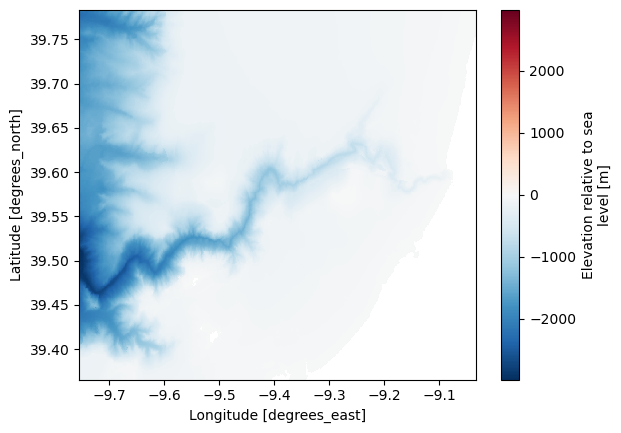

In [6]:
# --- Plot the 2D elevation map
ds.elevation.plot()

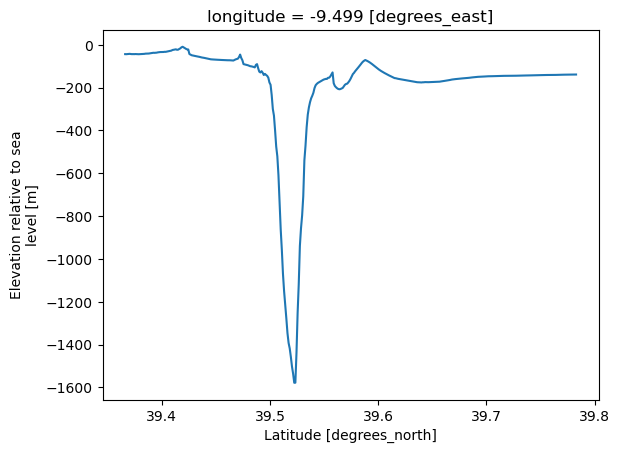

In [7]:
# --- Plot our selection
first_selection.plot()

### Easy Statistic

You can do stats like compute a mean or standart deviation. These calculus are either apply to the whole DataArray or a given dimension

In [8]:
# --- compute mean
mean_elevation = ds.elevation.mean() # mean for all latitude and longitudes
mean_elevation_along_longitude = ds.elevation.mean(dim = 'longitude') # mean only along longitude
print(f'The mean depth of the Nazare;s canyon is {mean_elevation_along_longitude.values} m') # see the .values at the end to get the answer in numpy array format


The mean depth of the Nazare;s canyon is [ -78.53749   -78.11486   -78.22937   -77.3525    -76.05934   -75.715
  -75.451744  -75.55708   -75.15077   -75.63643   -76.17748   -77.80358
  -80.10411   -82.41091   -85.36839   -88.97398   -93.09431   -97.676254
 -104.14882  -111.67983  -119.69248  -129.498    -139.63835  -150.27374
 -160.40527  -169.9722   -180.16895  -191.22916  -201.4851   -213.53183
 -228.30258  -244.04967  -262.1991   -278.88577  -296.07388  -309.6465
 -321.98074  -332.135    -341.54135  -348.24225  -357.08368  -363.5035
 -363.35712  -363.05682  -364.62085  -371.70685  -380.25784  -386.32288
 -394.18878  -398.62665  -405.4363   -406.7714   -408.79828  -408.81265
 -411.1496   -410.06622  -406.10107  -402.87976  -400.47372  -398.50925
 -397.2713   -397.40665  -394.59555  -392.49454  -389.84836  -387.68015
 -383.3248   -379.98648  -376.45776  -375.21268  -375.1963   -376.0184
 -373.9316   -371.5135   -367.19263  -364.86148  -361.86276  -359.42078
 -356.43283  -355.06146  -3

### Saving

Finally, you can save straightforward the analysis your performed into netcdf format (when your work involves netcdf files, I highly recommend to save your output in netcdf format as well)

In [9]:
file_output = 'my_result.nc'
path_output = './data'
# mean_elevation_along_longitude.to_netcdf(path_output + file_output)